In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import tensorflow as tf
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
os.chdir("E:/Kaggle_future_sale")

Using TensorFlow backend.


In [2]:
sales_train=pd.read_csv("sales_train.csv",index_col="date")

In [3]:
sales_train.index=pd.to_datetime(sales_train.index, format='%d.%m.%Y')

In [4]:
item_categories=pd.read_csv("item_categories.csv")

In [5]:
items=pd.read_csv("items.csv")
items=items[['item_id','item_category_id']]

In [152]:
sales_train=pd.merge(sales_train,items,how='left',on='item_id')
category_sale=sales_train.groupby('item_category_id').agg({'item_cnt_day':('sum','max'),'item_id':pd.Series.nunique}).reindex()
category_sale.columns = ["_".join(x) for x in category_sale.columns.ravel()]

In [170]:
category_sale.rename(columns={'item_cnt_day_sum':'total_sales','item_cnt_day_max':"max_item_sales",'item_id_numique':'item_number'}, inplace=True)

In [154]:
more_sale=category_sale[category_sale['total_sales']>category_sale['total_sales'].mean()+2*category_sale["total_sales"].std()]

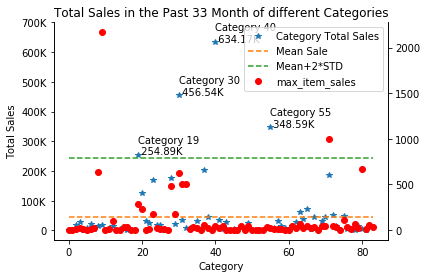

In [160]:
fig,ax=plt.subplots()
ax.plot(category_sale.index,category_sale['total_sales'],"*",label="Category Total Sales")
for i in more_sale.index:
    plt.annotate("Category %i \n %.2fK"%(i,more_sale.loc[i]["total_sales"]/1000),(i,more_sale.loc[i]["total_sales"]))
ax.plot(category_sale.index,[category_sale['total_sales'].mean()]*84,"--",label='Mean Sale')
ax.plot(category_sale.index,[category_sale['total_sales'].mean()+2*category_sale['total_sales'].std()]*84,"--",label='Mean+2*STD')
plt.xlabel("Category")
plt.yticks([0,100000,200000,300000,400000,500000,600000,700000],["0","100K","200K","300K","400K","500K",'600K','700K'])
plt.ylabel("Total Sales")
ax.spines['top'].set_visible(False)
ax2=ax.twinx()
ax2.plot(category_sale.index,category_sale['max_item_sales'],"ro",label='max_item_sales')
ax2.spines['top'].set_visible(False)
plt.title("Total Sales in the Past 33 Month of different Categories")
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)
plt.show()

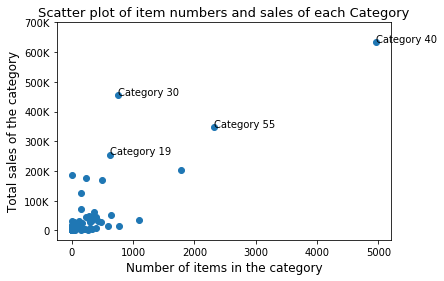

In [134]:
plt.scatter(category_sale['item_id'],category_sale["item_cnt_day"])
plt.xlabel("Number of items in the category",fontsize=12)
plt.ylabel("Total sales of the category",fontsize=12)
plt.yticks([0,100000,200000,300000,400000,500000,600000,700000],["0","100K","200K","300K","400K","500K",'600K','700K'])
plt.title("Scatter plot of item numbers and sales of each Category",fontsize=13)
for i in more_sale.index:
    plt.annotate("Category %i"%(i),(category_sale.loc[i]['item_id'],more_sale.loc[i]["item_cnt_day"]))
plt.show()

In [162]:
new_sales=sales_train.groupby(["date_block_num","shop_id","item_id",'item_category_id']).agg({'item_cnt_day':'sum','item_price':'mean'})

In [163]:
new_sales=new_sales.reset_index()

In [164]:
new_sales.rename(columns={'item_cnt_day':'item_cnt_month',}, inplace=True)

In [165]:
category_price=[]
category_sales=[]
for i in range(84):
    prices=new_sales[new_sales['item_category_id']==i]['item_price'].values
    sales=new_sales[new_sales['item_category_id']==i]['item_cnt_month'].values
    category_price.append(prices)
    category_sales.append(sales)

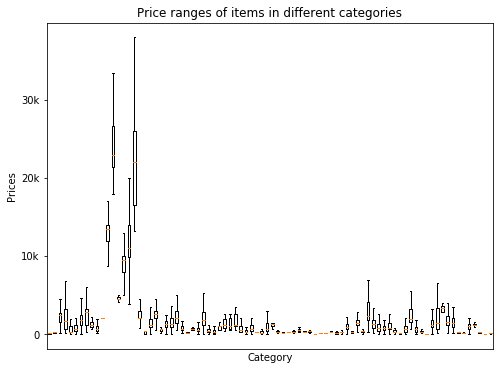

In [166]:
fig1,ax1=plt.subplots(figsize=(8,6))
ax1.boxplot(category_price,showfliers=False)
plt.title("Price ranges of items in different categories")
plt.xlabel("Category")
plt.ylabel("Prices")
plt.xticks([])
plt.yticks([0,10000,20000,30000],['0','10k','20k','30k'])
plt.show()

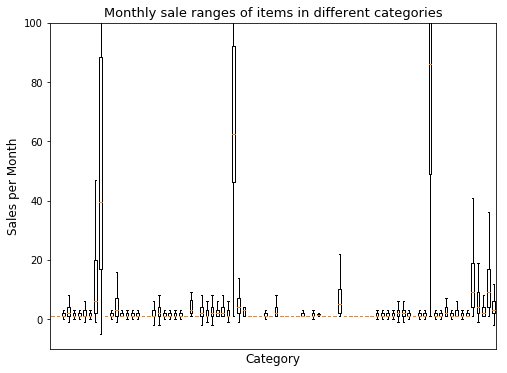

In [169]:
fig2,ax2=plt.subplots(figsize=(8,6))
ax2.boxplot(category_sales,showfliers=False)
plt.xticks([])
plt.title("Monthly sale ranges of items in different categories",fontsize=13)
plt.xlabel("Category",fontsize=12)
plt.ylabel("Sales per Month",fontsize=12)
plt.ylim(-10,100)
plt.show()